In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [15.0, 10.0]

In [2]:
# Read world Countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Read world cities
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Read Graticules 
graticules = gpd.read_file('ne_110m_graticules_all/ne_110m_graticules_10.shp')

In [3]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
cities.crs == world.crs == graticules.crs

True

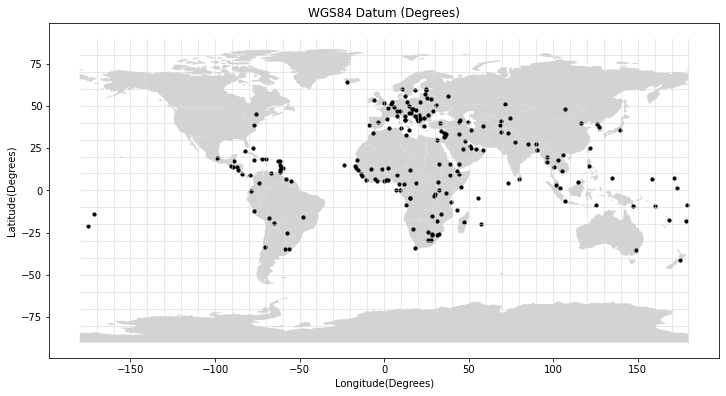

In [5]:
fig, ax = plt.subplots(figsize=(12,10))

world.plot(ax=ax, color='lightgray')

cities.plot(ax=ax, color='black', markersize=10, marker ='o')

graticules.plot(ax=ax, color='lightgray', linewidth=0.5)

ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)', title='WGS84 Datum (Degrees)')

plt.savefig('Plots/map1.png', dpi =1000)

In [6]:
world_eckert = world.to_crs('ESRI:54012')
graticules_eckert = graticules.to_crs('ESRI:54012')

In [7]:
def plot_map(gdf1, gdf2, gdf3, name,unit):
     fig, ax = plt.subplots(figsize=(12,10))
     gdf1.plot(ax=ax, color='lightgray')
     gdf2.plot(ax=ax, color='black', markersize=10, marker ='o')
     gdf3.plot(ax=ax, color='lightgray', linewidth=0.5)
     ax.set(xlabel='X Coordinate -'+unit,
            ylabel='Y Coordinate -' +unit,
            title=name)
plt.show()



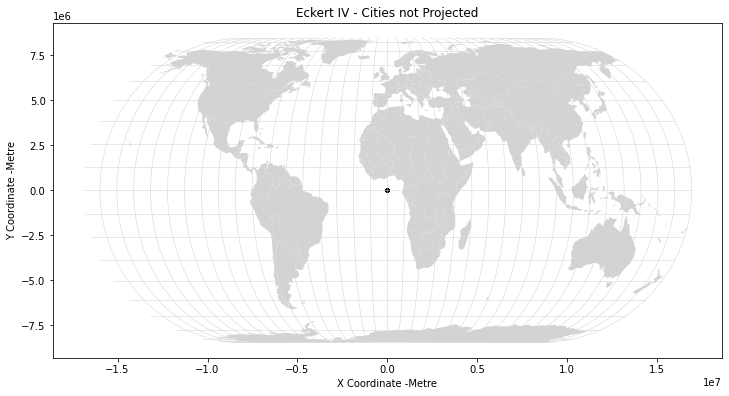

In [8]:
plot_map(world_eckert, cities, graticules_eckert, "Eckert IV - Cities not Projected", "Metre")
plt.savefig('Plots/map2.png', dpi =1000)

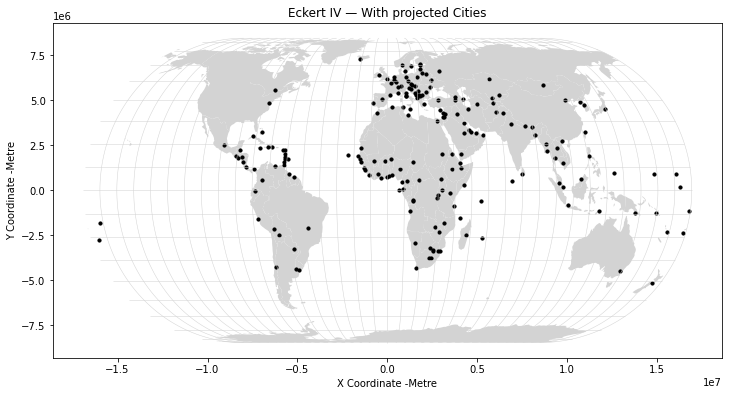

In [9]:
cities_eckert = cities.to_crs('ESRI:54012')
plot_map(world_eckert, cities_eckert, graticules_eckert, 'Eckert IV — With projected Cities', 'Metre')

plt.savefig('Plots/map3.png', dpi =1000)

In [10]:
world_robinson = world.to_crs('ESRI:54030')
graticules_robinson = graticules.to_crs('ESRI:54030')
cities_robinson = cities.to_crs('ESRI:54030')

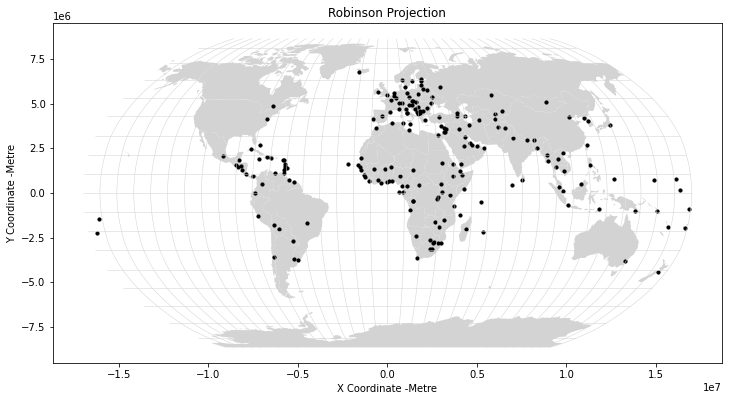

In [11]:
plot_map(world_robinson, cities_robinson, graticules_robinson, "Robinson Projection", "Metre")
plt.savefig('Plots/map4.png', dpi =1000)